In [24]:
import numpy as np
import matplotlib.pyplot as plt

def CampoE(A):
    Ny = A.shape[1]
    for y in range(1,Ny-1):
        for x in range(1,Ny-1):
            Ex[y,x] = -(A[y,x+1]-A[y,x])
            Ey[y,x] = -(A[y+1,x]-A[y,x])
    return Ex,Ey

def Cond_borde(V):
    Nx = V.shape[1]
    Ny = V.shape[0]
    V[0,2:Nx-2]=-10
    V[Ny-1,2:Nx-2]=10
    V[Ny//2:Ny-4,Nx//2:Nx-4] = 3
    return V

def laplace(M,maxsteps):
    iter = 0
    Nx = M.shape[1]
    Ny = M.shape[0]
    while iter < maxsteps:
        Atemp = M.copy()
        for y in range(0,Ny):
            for x in range(0,Nx):
                if x>0 and y>0 and x<Nx-1 and y<Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y-1,x])
                if x == 0 and y>0 and y<Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y-1,x])
                if x == Nx-1 and y>0 and y<Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y-1,x])
                if x>0 and y==0 and x<Nx-1 and y<Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y+1,x]+Atemp[y,x])
                if x>0 and y>0 and x<Nx-1 and y==Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x+1]+Atemp[y,x-1]+Atemp[y,x]+Atemp[y-1,x])
                if x==0 and y==0:
                    M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y,x+1])
                if x==Nx-1 and y==Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y-1,x]+Atemp[y,x-1])
                if x==0 and y==Ny-1:
                    M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y-1,x]+Atemp[y,x+1])
                if x==Nx-1 and y==0:
                    M[y,x] = 0.25*(Atemp[y,x]+Atemp[y,x]+Atemp[y+1,x]+Atemp[y,x-1])
        M = Cond_borde(M)
        iter +=1
    return M

Nx=2**5
Ny=2**5
print(Nx,Ny)
ancho = 1
alto = 1
x = np.linspace(-ancho/2,ancho/2,Nx)
y = np.linspace(-alto/2,alto/2,Ny)

V = np.zeros((Nx,Ny))
V = Cond_borde(V)

V = laplace(V,1000)
Ex = np.zeros((Nx,Ny))
Ey = np.zeros((Nx,Ny))
Ex,Ey = CampoE(V)

print('Listo')

32 32
Listo


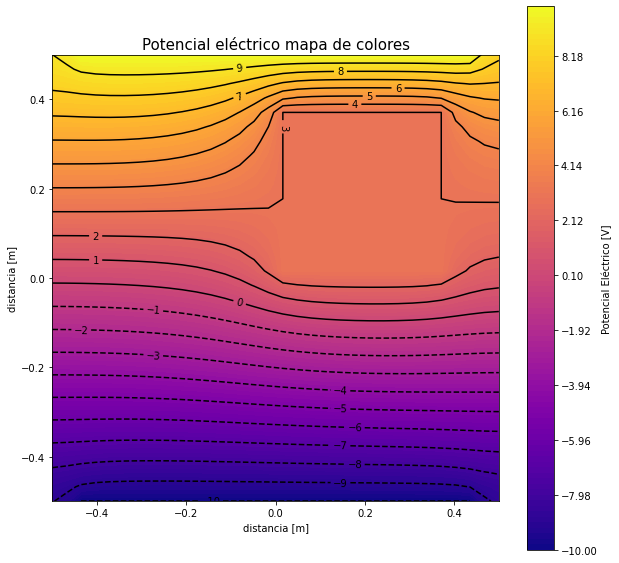

In [25]:
levels = np.linspace(np.min(V), np.max(V), 100)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
f = plt.contourf(x, y, V,levels, cmap='plasma')
contours = plt.contour(x, y,V,20, colors='black')
plt.clabel(contours, inline=True, fontsize=10)

cbar = plt.colorbar(f)
cbar.ax.set_ylabel('Potencial Eléctrico [V]')
ax.set_aspect('equal')
ax.set_title('Potencial eléctrico mapa de colores',fontsize=15)
ax.set_xlabel('distancia [m]')
ax.set_ylabel('distancia [m]')

plt.show()

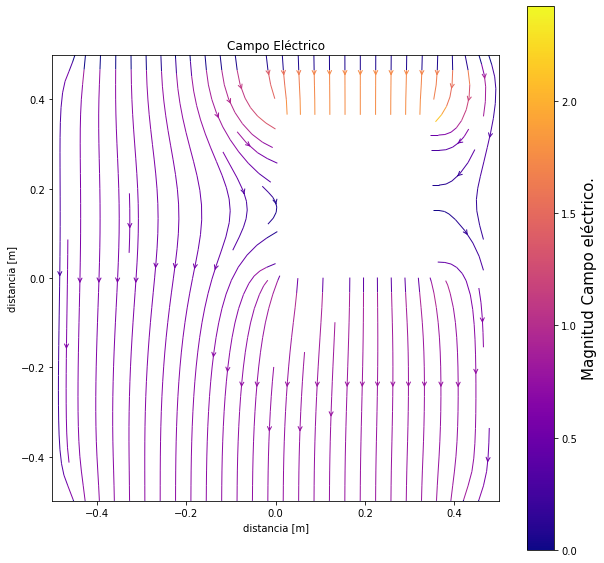

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
color = (np.hypot(Ex, Ey))
f = plt.streamplot(x, y, Ex, Ey, color=color,linewidth=1, cmap='plasma',
              density=1, arrowstyle='->', arrowsize=1)
cbar = fig.colorbar(f.lines)
cbar.ax.set_ylabel('Magnitud Campo eléctrico.',fontsize=15)
ax.set_aspect('equal')
ax.set_title('Campo Eléctrico')
ax.set_xlabel('distancia [m]')
ax.set_ylabel('distancia [m]')
plt.show()

### **Estudiando la dispersión en los datos**

El siguiente gráfico nos muestra los puntos (en rojo), y el boxplot asociado a ellos. 

**Comentarios:**
* Note que mirando solo los puntos es difícil indentificar la mediana, o los cuantiles, e incluso outliers.
* El Boxplot nos entrega esta información rápidamente.

### **Comparación de varios grupos** 

Un gráfico de Boxplot además es una excelente herramienta para comparar dos o más grupos de datos en términos de su dispersión.

### **Los boxplot nos podrían engañar**

Para distribuciones bimodales, o multimodales, los boxplot no parecen ser una buena opcion para observar este tipo de comportamiento

In [ ]:
np.random.seed(1)
n1=100
n2=150

d1=np.random.normal(-1,0.5,n1)
d2=np.random.normal(6,1,n2)


tipo=["T1"]*(n1+n2)
valor=np.concatenate((d1,d2))

D={"Valor":valor,"Tipo":tipo}
df=pd.DataFrame(D)
df.head()

,Valor,Tipo
0,-0.187827,T1
1,-1.305878,T1
2,-1.264086,T1
3,-1.536484,T1
4,-0.567296,T1


Note que si solo miramos al boxplot, perdemos la información sobre la bimodalidad de nuestros datos. 

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


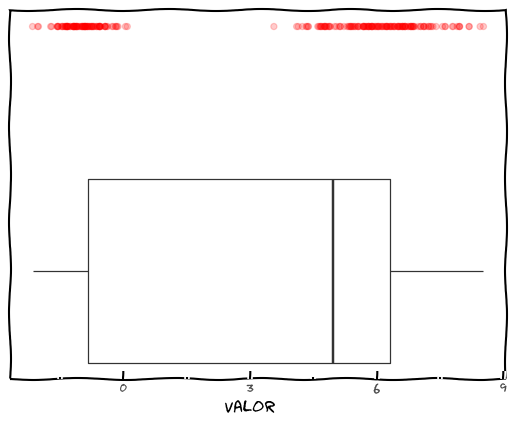

<ggplot: (8729693073953)>

In [ ]:
(ggplot(df)+
 aes(x=0,y="Valor")+
 geom_boxplot()+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 #stat_boxplot(geom="errorbar",width=0.1)+
 scale_x_continuous(breaks=None)+
 theme_xkcd()+
 xlab("")+
 coord_flip()
)

# <font color="teal"> **Construcción de un boxplot**</font>



## Cargamos los datos

Cargamos la base de datos que utilizaremos para nuestro ejemplo práctico.
*  **MXvideos**: contiene información de videos de youtube vistos en Mexico (https://www.kaggle.com/datasnaek/youtube-new/version/115?select=MXvideos.csv).

Para cargar la base de datos, usamos el método ``read_csv`` de Pandas (Ojo que esta base de datos, al ser de México, tiene muchos tíldes y ñ's)

In [ ]:
MXvid = pd.read_csv("MXvideos.csv",sep=",",header=0, engine='python')

In [ ]:
#Procedemos a visualizar los datos utilizando la función head()
MXvid.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


Utilizamos el comando *describe* para obtener los estadísticos de resumen básicos de las variables continuas.

In [ ]:
#Utilizando la función describe podemos obtener estadísticos de resumen básicos
#MXvid.describe()
pd.DataFrame.describe(MXvid)

,category_id,views,likes,dislikes,comment_count
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000


Lo primero que notamos es que existe una gran diferencia entre el tercer cuantil (correspondiente al 75%) y el máximo en todas las variables. Entonces, nos va a convenir tomar una transformación logaritmo a los datos para construir un boxplot 

**Tarea:** grafique un boxplot sin realizar esta operación, ¿Qué puede concluir?

In [ ]:
MXvid2=MXvid[["views","likes","dislikes","comment_count"]]
MXvid2=np.log(MXvid2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


## Boxplot básico
Seguimos los siguientes pasos para graficar un **Boxplot**
1. Utilizaremos el comando **ggplot()** que recibe como parámetro un dataframe de pandas.
2. Luego, el comando **aes(y=,x=)** carga los datos que vamos a usar para el eje x, y el eje y. En este caso como graficamos un Boxplot:
  *   Eje x: Defininimos x=0 (u otro numero que defina como va estar centrado el boxplot)
  *   Eje y: Definimos y como la variable de interés
3. Finalmente cargamos Boxplot **+geom_boxplot()**

**OJO: todos los comandos ggplot deben estar dentro de dos parentesis, ya que la gramatica de ggplot no es reconocida por Python**

**Mas info sobre plotnine en:**
https://plotnine.readthedocs.io/en/stable/api.html#

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 639 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


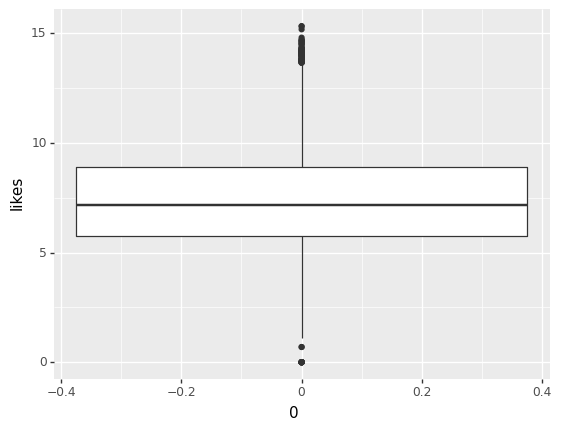

<ggplot: (8729693061145)>

In [ ]:
(
ggplot(MXvid2)+
aes(x=0,y="likes")+
geom_boxplot()
)

## Título, ejes y función theme


1.   El título se puede agregar utilizando el comando **+ggtitle("mi titulo")**
2.   **+xlab("eje x")** modifica el nombre del eje x
3.   **+xlab("eje y")** modifica el nombre del eje y
4.   Finalmente la función el comando **theme()** modifica el estilo del gráfico y tiene muchos parámetros que pueden modificar. Sin embargo existen algunos temas predefinidos. 

  **Ejemplos:**
  *   theme_minimal()
  *   theme_classic()
  *   theme_dark()
  *   theme_light()
  *   theme_xkcd() (este formato es tipo comics :D )

**Mas opciones de theme:**
https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html#plotnine.themes.theme

**Más opciones de temas predefinidos**
https://plotnine.readthedocs.io/en/stable/api.html#themes


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 639 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


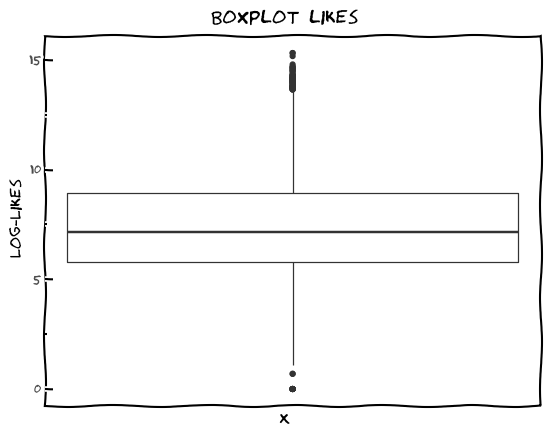

<ggplot: (8729693044377)>

In [ ]:
(ggplot(MXvid2)+
 aes(y="likes",x=0)+
 geom_boxplot()+
 scale_x_continuous(breaks=None)+ #Este comando sirve para setear la cuadrícula del eje x. Cuando breaks=None se elimina la cuadrícula.
 xlab("X")+
 theme_xkcd()+
ylab("Log-Likes")
+ggtitle("Boxplot likes")
)

## Editando un boxplot

Ahora vamos a editar nuestro boxplot para que se vea más agradable a la vista. Los siguientes parámetros se especifican dentro de la funcion **geom_boxplot()**


1.   **fill:** modifica el color de la caja
2.   **colour:** modifica el color de los bordes de la caja
3.   **alpha:** añada transparencia a fill (alpha=0 completamente transparente, y alpha=1 color solido)
4.   **outlier_shape:** modifica la forma en que se grafica el outlier. E.g. "+", "*", "o", "."
5.   **outlier_colour:** modifica el color de los outliers
6.   **outlier_alpha:** transparencia de los outliers
7.   **size:** grosor lineas del boxplot
8.   **fatten:** aumenta el grosor de la linea que muestra la mediana.






/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 639 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


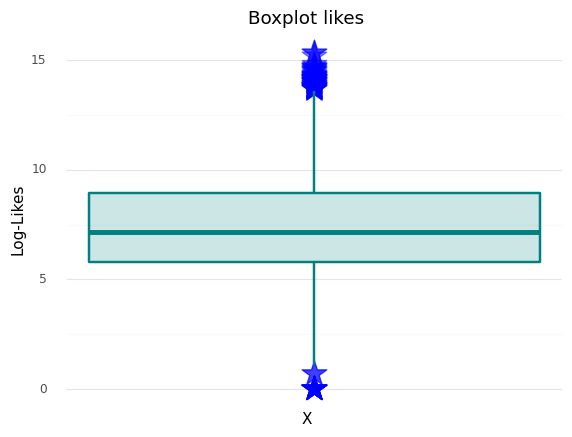

<ggplot: (8729693045281)>

In [ ]:
(ggplot(MXvid2)+
 aes(y="likes",x=0)+
 geom_boxplot(fill="teal",colour="teal",outlier_shape="*",outlier_colour="blue",alpha=0.2,size=1,outlier_size=10,outlier_alpha=0.5)+ 
 scale_x_continuous(breaks=None)+
 theme_minimal()+
 xlab("X")+
 ylab("Log-Likes")+
 ggtitle("Boxplot likes")
)

## Múltiples boxplots

En algunas ocaciones, será de interés comparar el valor de una variable continua para múltiples categorias, ó multiples variables continuas que viven en la misma escala.

**Ejemplo:**
* **Sí** tiene sentido comparar directamente (en el mismo boxplot) el número de likes y dislikes
* **No** tiene sentido comparar en el mismo boxplot el número de likes y el dinero invertido en la producción ya que viven en escalas de valores distintas.


In [ ]:
#Creamos una nueva base de datos con una columna conteo, y otra que nos especifica el tipo (views, likes, dislikes, comment_count).
l=len(MXvid2["views"])
Multi={"counts":list(MXvid2["views"])+list(MXvid2["likes"])+list(MXvid2["dislikes"])+list(MXvid2["comment_count"]),"Type":["views"]*l+["likes"]*l+["dislikes"]*l+["comment_count"]*l}
Multi=pd.DataFrame.from_dict(Multi)



Para crear múltiples boxplot de una variable continua, e.g., "counts", respecto a una variable categorica, e.g., "Type", utilizamos el comando: 
* **aes(x=Type,y="counts")**.

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


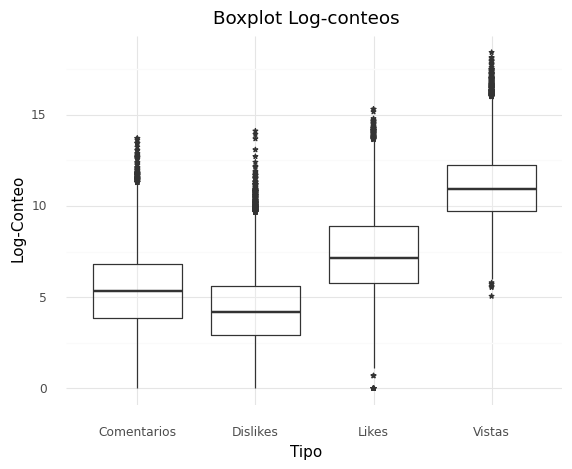

<ggplot: (8729693026369)>

In [ ]:
(
 ggplot(Multi)+
 aes("Type","counts")+
 geom_boxplot(alpha=0.2,outlier_shape="*")+
 xlab("Tipo")+
 ylab("Log-Conteo")+
 theme_minimal()+
 ggtitle("Boxplot Log-conteos")+
 scale_x_discrete(labels=["Comentarios","Dislikes","Likes","Vistas"]) #Nos permite renombrar los tipos en la variable Type
)
 

En el caso de querer distintos colores (colour y fill) para cada boxplot, especificamos esto en el comando aes escribiendo:
*   **aes("Type","counts",colour="Type",fill="Type")**

Al recibir como argumento "Type" (el nombre de la columna de nuestro dataframe), los parámetros colour y fill considerarán un color distinto para cada nivel (valor) de la variable Type. Además, se creará una leyenda.



/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


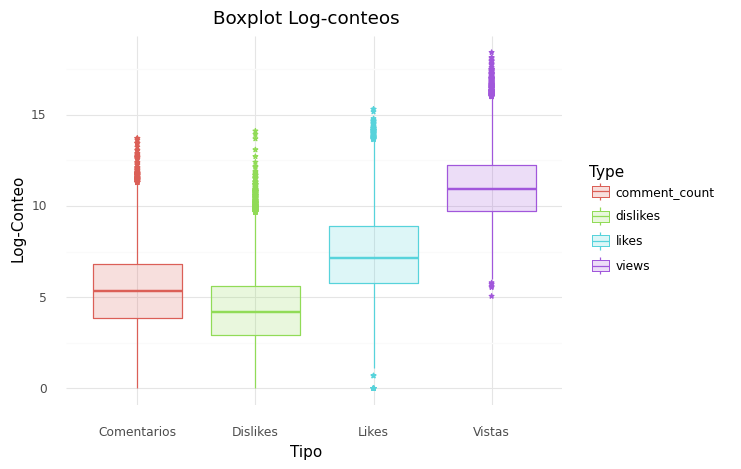

<ggplot: (8729693016621)>

In [ ]:
(
 ggplot(Multi)+
 aes("Type","counts",colour="Type",fill="Type")+
 geom_boxplot(alpha=0.2,outlier_shape="*")+
 xlab("Tipo")+
 ylab("Log-Conteo")+
 theme_minimal()+
 ggtitle("Boxplot Log-conteos")+
 scale_x_discrete(labels=["Comentarios","Dislikes","Likes","Vistas"]) #Nos permite renombrar los tipos en la variable Type
 )

## Manipulación de la leyenda

En el gráfico anterior nos gustaria manipular tanto los colores para cada categoría, como el nombre y labels en la leyenda. Estas modificaciones se pueden hacer fácilmente en ggplot.

Pasos:
1.   Definimos colour y fill dentro de aes para crear una leyenda
2.   Utilizamos **scale_fill_manual(...)** para definir los colores del argumento fill en **aes(...)**. Esta función recibe como argumentos:
    *   **name:** Nombre de la leyenda
    *   **labels:** Etiquetas para cada valor de la variable categorica definida en aes
    *   **values:** Un vector de colores para cada valor de la variable categorica definida en aes. E.g. "red" o formato HEX "#fa0000"
3.   Utilizamos **scale_colour_manual(...)** para definir los colores del argumento colour en **aes(...)**. Esta función recibe como argumentos:
    *   **name:** Nombre de la leyenda
    *   **labels:** Etiquetas para cada valor de la variable categorica definida en aes
    *   **values:** Un vector de colores para cada valor de la variable categorica definida en aes. E.g. "red" o formato HEX "#fa0000".




/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


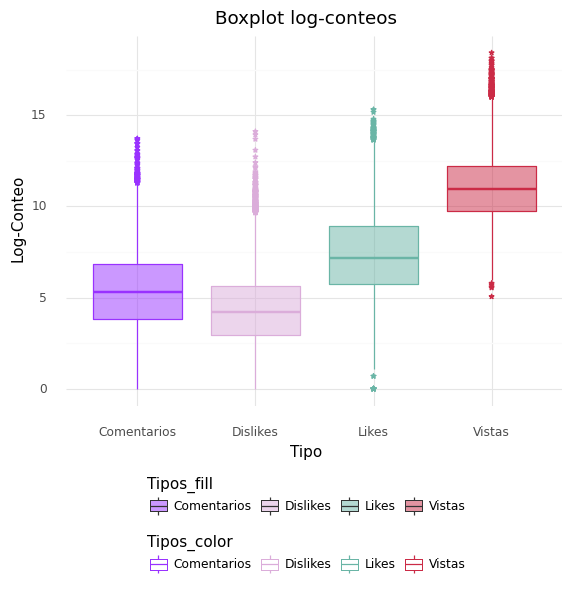

<ggplot: (8729692988989)>

In [ ]:
#Definimos colores y nombres personalizados 
Labs=["Comentarios","Dislikes","Likes","Vistas"]
ColFill=["#9932ff","#dbadda","#6ab5a6","#cb2b46"]
ColLinea=["#9932ff","#dbadda","#6ab5a6","#cb2b46"]

(
 ggplot(Multi)+
 aes("Type","counts",colour="Type",fill="Type")+ #Definimos colour y fill dentro de aes para crear una leyenda
 geom_boxplot(alpha=0.5,outlier_shape="*")+
 xlab("Tipo")+
 ylab("Log-Conteo")+
 theme_minimal()+
 theme(legend_position="bottom",legend_box_spacing=0.5)+
 scale_fill_manual(name="Tipos_fill",labels=Labs,values=ColFill)+ #Determina el color y nombres de fill en aes (este es el color del relleno del boxplot)
 scale_colour_manual(name="Tipos_color",labels=Labs,values=ColLinea)+ #Determina el color y nombres de colour en aes (este es el color de las lineas del boxplot)
 scale_x_discrete(labels=Labs)+
 #coord_flip()+
 ggtitle("Boxplot log-conteos")
 )


Para combinar las leyendas simplemente **le ponemos el mismo nombre**


/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


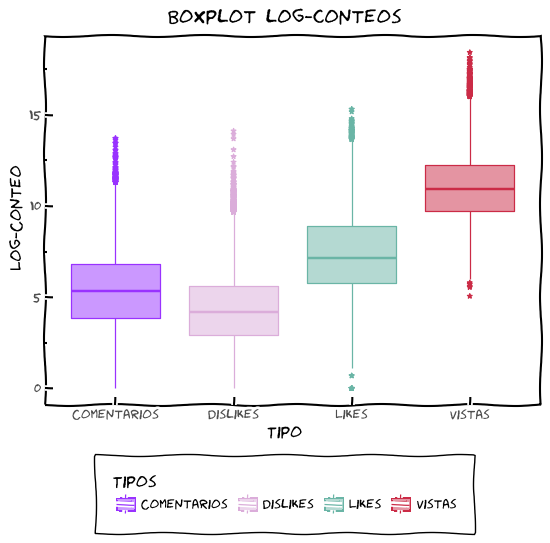

<ggplot: (8729692956097)>

In [ ]:
(
 ggplot(Multi)+
 aes("Type","counts",colour="Type",fill="Type")+
 geom_boxplot(alpha=0.5,outlier_shape="*")+
 xlab("Tipo")+
 ylab("Log-Conteo")+
 theme_xkcd()+
 theme(legend_position="bottom",legend_box_spacing=0.5)+
 scale_fill_manual(name="Tipos",labels=Labs,values=ColFill)+ #Mismo nombre "Tipos" que en scale_colour_manual
 scale_colour_manual(name="Tipos",labels=Labs,values=ColLinea)+ #
 scale_x_discrete(labels=Labs)+
 #coord_flip()+
 ggtitle("Boxplot log-conteos")
 )

## Separación por una segunda variable categórica.

En esta sección consideramos graficar la variable conteo considerando el tipo y el año, es decir, usando dos varibles categoricas: "Type" y "Year".

Creamos entonces la variable "Year" en el dataframe Multi.


In [ ]:
Date=MXvid["trending_date"]
Year=[0]*len(Date)
for i in range(len(Date)):
  Year[i]=Date[i].split(".")[0]
Year={"Year":Year+Year+Year+Year}

Year=pd.DataFrame.from_dict(Year)
Multi.insert(0,"Year",Year)



Ahora el dataframe Multi incluye una columna "Year"

In [ ]:
Multi.columns

Index(['Year', 'counts', 'Type'], dtype='object')

Para separar por una segunda variable categórica (en este caso "Year"), podemos utilizar la función:
*   **facet_wrap("Year")** (recibe como argumento la segunda variable categorica que queremos considerar)




/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


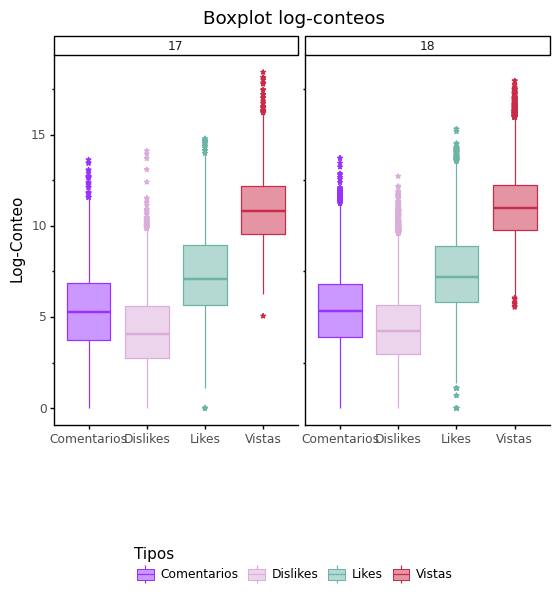

<ggplot: (8729692995449)>

In [ ]:
(
 ggplot(Multi)+
 aes("Type","counts",colour="Type",fill="Type")+
 geom_boxplot(alpha=0.5,outlier_shape="*")+
 xlab("")+
 ylab("Log-Conteo")+
 theme_classic()+
 theme(legend_position="bottom",legend_box_spacing=1)+
 scale_fill_manual(name="Tipos",labels=Labs,values=ColFill)+
 scale_colour_manual(name="Tipos",labels=Labs,values=ColLinea)+
 scale_x_discrete(labels=Labs)+
 #coord_flip()+
 ggtitle("Boxplot log-conteos")+
 facet_wrap("Year")
  )

Note que en el grafico anterior no puede leer claramente el label correspondiente a "comentarios". Por lo tanto usamos el atributo 
*   **axis_text_x=element_text(angle=50)**
dentro de **theme()** para cambiar el ángulo en que se muestran los labels.

**Ejercicio:** Pruebe distintos ángulos

Además, note que en dataframe Multi, la variable "Year" tiene dos valores "17" y "18". Si queremos cambiar estos valores (por ejemplo por "2017" y "2018") esto lo podemos hacer directamente en el dataframe, o utilizando una función **"rename"** que se le entrega como argumento al parámetro **"labeller"** de **facet_wrap()**

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


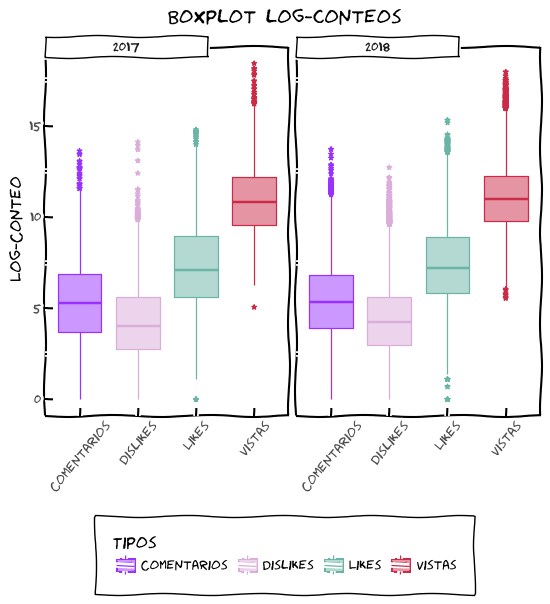

<ggplot: (8729694983781)>

In [ ]:
#Función rename
def rename(names):
    if(names=="17"):
      return "2017"
    elif(names=="18"):
      return "2018"
    else:
      return names

(
 ggplot(Multi)+
 aes("Type","counts",colour="Type",fill="Type")+
 geom_boxplot(alpha=0.5,outlier_shape="*")+
 xlab("")+
 ylab("Log-Conteo")+
 theme_xkcd()+
 theme(legend_position="bottom",legend_box_spacing=1,axis_text_x=element_text(angle=50))+ #Aca se cambia el ángulo
 scale_fill_manual(name="Tipos",labels=Labs,values=ColFill)+
 scale_colour_manual(name="Tipos",labels=Labs,values=ColLinea)+
 scale_x_discrete(labels=Labs)+
 #coord_flip()+
 ggtitle("Boxplot log-conteos")+
 facet_wrap("Year",labeller=rename) #se le entrega la función rename a facet_wrap
  )

Finalmente podriamos querer comparar el año para cada tipo, por lo que invertimos el orden en que graficamos. 

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 2559 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 241 missing from current font.
  font.set_text(s, 0.0, flags=flags)


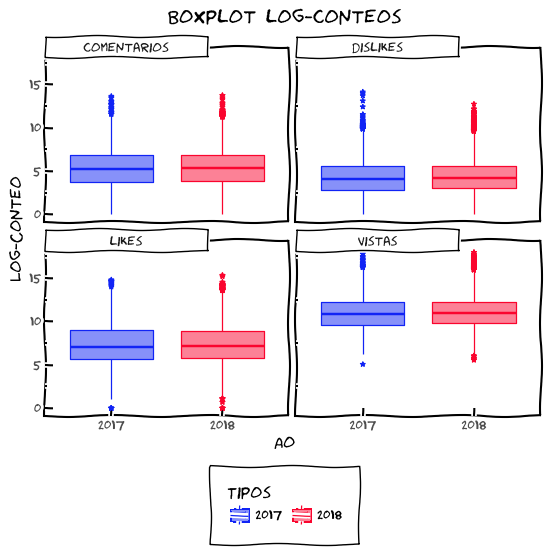

<ggplot: (8729696486685)>

In [ ]:
Labs2=["2017","2018"]
ColFill2=["#1124f5","#fa052e"]
ColLinea2=["#1124f5","#fa052e"]

def rename(names):
    if(names=="comment_count"):
      return "comentarios"
    elif(names=="views"):
      return "vistas"
    else:
      return names

(
 ggplot(Multi)+
 aes("Year","counts",colour="Year",fill="Year")+
 geom_boxplot(alpha=0.5,outlier_shape="*")+
 xlab("Año")+
 ylab("Log-Conteo")+
 theme_xkcd()+
 theme(legend_position="bottom",legend_box_spacing=0.5)+
 scale_fill_manual(name="Tipos",labels=Labs2,values=ColFill2)+
 scale_colour_manual(name="Tipos",labels=Labs2,values=ColLinea2)+
 scale_x_discrete(labels=Labs2)+
 ggtitle("Boxplot log-conteos")+
 facet_wrap("Type",labeller=rename)
)